# 3. Data Modeling

## Implement Baselines
<hr>

To fit our baseline model we will use OLS (Ordinary Least Squares Regression). We will split our dataset into a train and test (65 / 35) and run 10 Linear Regression simulations to calculate the Train and Test Score. 

In [13]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pylab
import scipy.stats as stats
import math
%matplotlib inline

In [14]:
# helper function for plotting residual plots
def plot_residual(ax1, ax2, ax3, y_pred, y_real, line_label, title):
    ax1.scatter(y_pred, 
                y_real, 
                color='blue',
                alpha=0.6,
                label=line_label)
    ax1.set_xlabel('Predicted Y') 
    ax1.set_ylabel('Real Y')
    ax1.legend(loc='best')
    ax1.set_title(title)

    ax2.scatter(y_pred,
                y_real - y_pred, 
                color='green',
                marker='x',
                alpha=0.6,
                label='Residual')
    ax2.set_xlabel('Predicted Y')
    ax2.set_ylabel('Residual')
    
    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')

    ax2.legend(loc='best')
    ax2.set_title('Residual Plot')
    
    ax3.hist(y_real - y_pred, bins=30, color='green', alpha=0.7)
    ax3.set_title('Histogram of residual values')
    
    return ax1, ax2, ax3

In [15]:
class model:
    
    def __init__(self, model):
        self.model = model
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.y_pred_train = None
        self.y_pred_test = None
        self.train_score = None
        self.test_score = None
        self.train_score_log = None
        self.test_score_log = None
    
    def data_split(self, x, y, test_size):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=test_size)
    
    def score_reg(self):
        return self.train_score, self.test_score
    
    def score_log(self):
        self.train_score_log = metrics.r2_score(np.exp(self.y_train), np.exp(self.y_pred_train))
        self.test_score_log = metrics.r2_score(np.exp(self.y_test), np.exp(self.y_pred_test))
        return self.train_score_log, self.test_score_log
    
    def data_frame_convert(self):
        df_train = pd.DataFrame({'y_pred': self.y_pred_train, 'y_real': self.y_train})
        df_test = pd.DataFrame({'y_pred_test': self.y_pred_test, 'y_real_test': self.y_test})
        return self.train_score, self.test_score, df_train, df_test

    def data_frame_convert_log(self):
        df_train = pd.DataFrame({'y_pred': np.exp(self.y_pred_train), 'y_real': np.exp(self.y_train)})
        df_test = pd.DataFrame({'y_pred_test': np.exp(self.y_pred_test), 'y_real_test': np.exp(self.y_test)})
        return self.train_score_log, self.test_score_log, df_train, df_test
    
    def fit_model(self, x, y, test_size):
        self.data_split(x, y, test_size)
        self.model = self.model.fit(self.x_train, self.y_train)
        self.train_score = self.model.score(self.x_train, self.y_train)
        self.test_score = self.model.score(self.x_test, self.y_test)
        self.y_pred_train = self.model.predict(self.x_train)
        self.y_pred_test = self.model.predict(self.x_test)
    
def model_iterations(n, x, y, model_arg, log_bool=False):
    new_model = model(model_arg)
    training_scores = [None]*n
    testing_scores = [None]*n

    for i in range(n):
        new_model.fit_model(x, y, 0.3)
        training_scores[i], testing_scores[i] = new_model.score_reg() if not log_bool else new_model.score_log()

    print 'Mean Train Score:', np.mean(training_scores)
    print 'Mean Test Score:', np.mean(testing_scores)
    return new_model

In [16]:
data = pd.read_csv('../datasets/listings_neighborhood_clean.csv')
data.head()

,id,host_id,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,host_listing_count,...,50-59,60-69,70-79,80-84,85-89,90-94,95-100,No Reviews,price,price_log
0,1069266,5867023,-0.520256,-0.331519,-0.407440,-0.493059,0.173446,0.390321,2.716276,-0.355986,...,0,0,0,0,1,0,0,0,160.0,5.075174
1,2061725,4601412,-0.520256,-0.331519,-0.407440,0.381668,0.173446,-0.965980,1.295702,0.932775,...,0,0,0,0,0,0,1,0,58.0,4.060443
2,44974,198425,-0.520256,-0.331519,-0.407440,-0.493059,2.885991,-1.205327,0.822177,-0.355986,...,0,0,0,0,0,0,1,0,185.0,5.220356
3,4701675,22590025,-0.520256,-0.331519,-0.407440,0.381668,-0.601567,1.108363,-0.493170,-0.355986,...,0,0,0,0,0,0,1,0,195.0,5.273000
4,68914,343302,1.690843,-0.331519,1.266082,1.256396,-0.214061,-0.407503,0.296038,0.073601,...,0,0,0,0,0,0,1,0,165.0,5.105945


In [17]:
# split into x and y (note that we do not include id and host_id as predictors)
x = data.iloc[:, 2:-2]
y = data.iloc[:, -2]
y_log = data.iloc[:, -1]

## Linear Regression Model

### Linear Regression with Non Log-Transformed Response

In [18]:
Lin_Reg_Model = model_iterations(1, x, y, Lin_Reg(fit_intercept=True))

Mean Train Score: 0.308946773385
Mean Test Score: -8.12485938545e+16


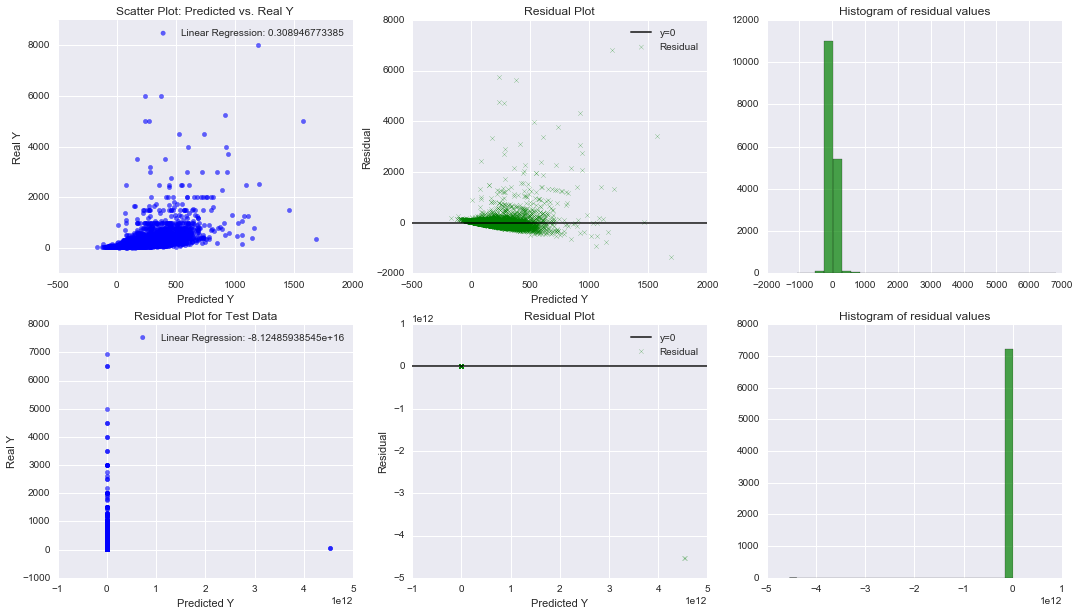

In [19]:
# plot the residuals of a linear regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

data_vals = Lin_Reg_Model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], data_vals[2]['y_pred'], data_vals[2]['y_real'], 'Linear Regression: {}'.format(data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], data_vals[3]['y_pred_test'], data_vals[3]['y_real_test'], 'Linear Regression: {}'.format(data_vals[1]), 'Residual Plot for Test Data')
plt.show()

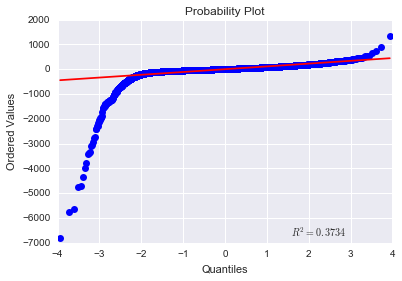

In [20]:
# qq plot for the train residuals
stats.probplot(data_vals[2]['y_pred'] - data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Linear Regression with Log-Transformed Response

In [21]:
Lin_Reg_Model_log = model_iterations(1, x, y_log, Lin_Reg(fit_intercept=True), True)

Mean Train Score: 0.328725382832
Mean Test Score: 0.373708118826


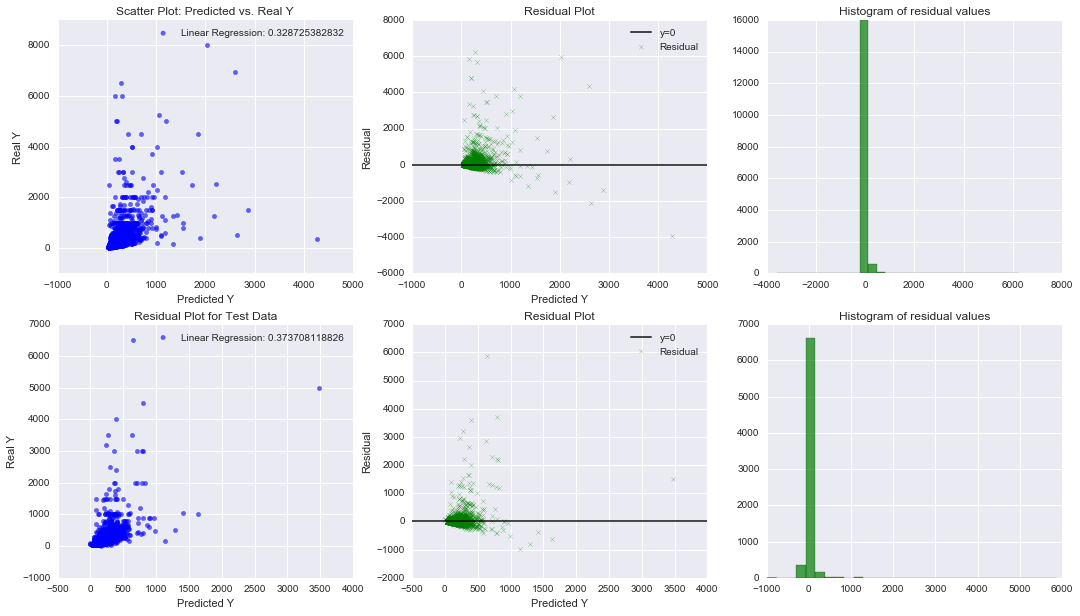

In [22]:
# plot the residuals of a linear regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

data_vals = Lin_Reg_Model_Log.data_frame_convert_log()
plot_residual(axes[0][0], axes[0][1], axes[0][2], data_vals[2]['y_pred'], data_vals[2]['y_real'], 'Linear Regression: {}'.format(data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], data_vals[3]['y_pred_test'], data_vals[3]['y_real_test'], 'Linear Regression: {}'.format(data_vals[1]), 'Residual Plot for Test Data')
plt.show()

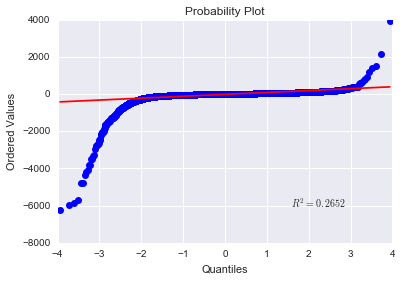

In [23]:
# qq plot for the train residuals
stats.probplot(data_vals[2]['y_pred'] - data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

## Ridge & Lasso Regression

### Ridge Regression with Non Log-Transformed Response

In [6]:
reg_params = 10.**np.linspace(-10, 5, 10)
RidgeCV_model = model_iterations(1, x, y, RidgeCV(alphas=reg_params, fit_intercept=True, cv=5))

Mean Train Score: 0.317389383417
Mean Test Score: 0.287039215886


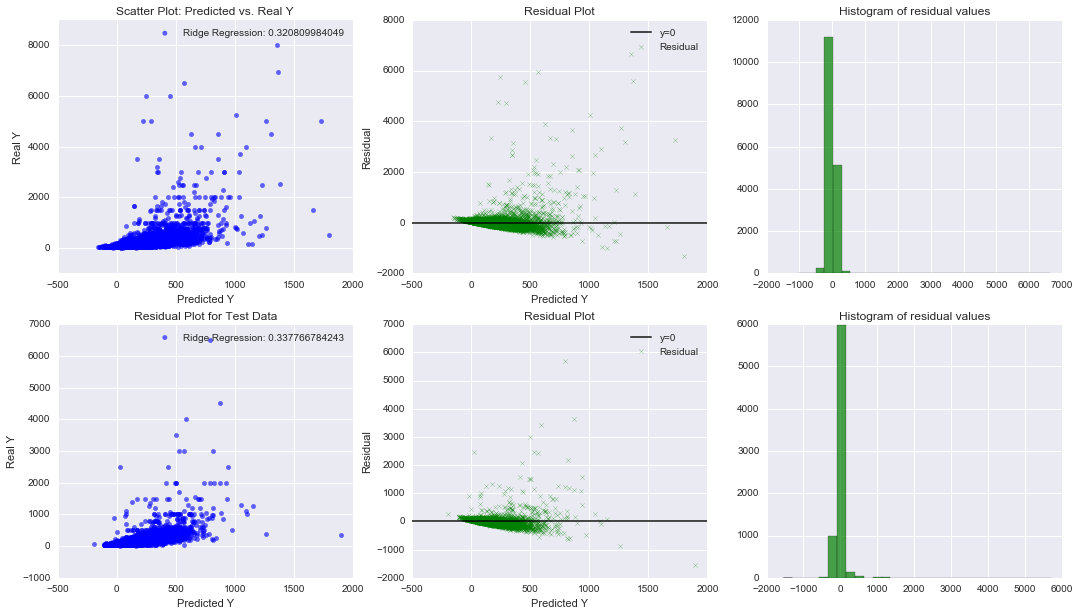

In [29]:
# plot the residuals of a ridge regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = RidgeCV_model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(ridge_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(ridge_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

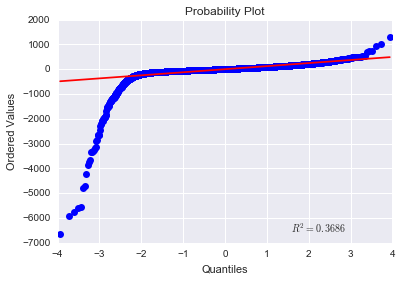

In [30]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Ridge Regression with Log-Transformed Response

In [31]:
reg_params = 10.**np.linspace(-10, 5, 10)
RidgeCV_model = model_iterations(5, x, y_log, RidgeCV(alphas=reg_params, fit_intercept=True, cv=5), True)

Mean Train Score: 0.355490988957
Mean Test Score: 0.361796683246


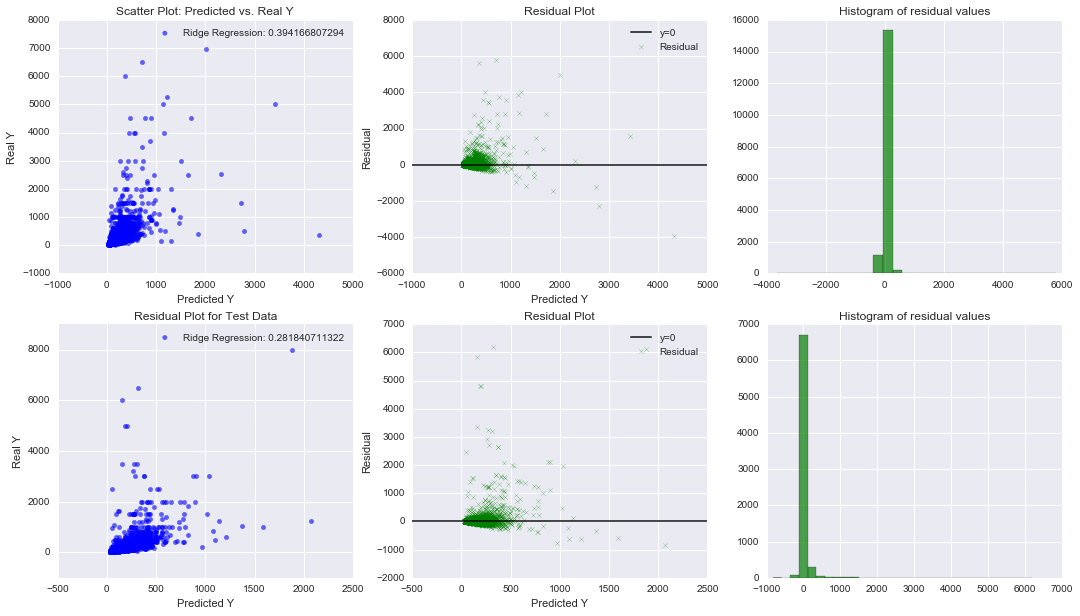

In [32]:
# plot the residuals of a ridge regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = RidgeCV_model.data_frame_convert_log()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(ridge_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(ridge_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

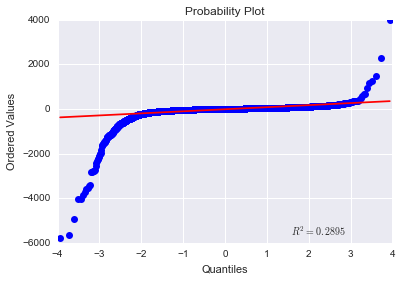

In [33]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Lasso Regression with Non-Transformed Response

In [34]:
reg_params = 10.**np.linspace(-10, 5, 10)
LassoCV_model = model_iterations(5, x, y, LassoCV(alphas=reg_params, fit_intercept=True, cv=5))

/Users/AlexPeed/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


Mean Train Score: 0.332268851922
Mean Test Score: 0.310043979761


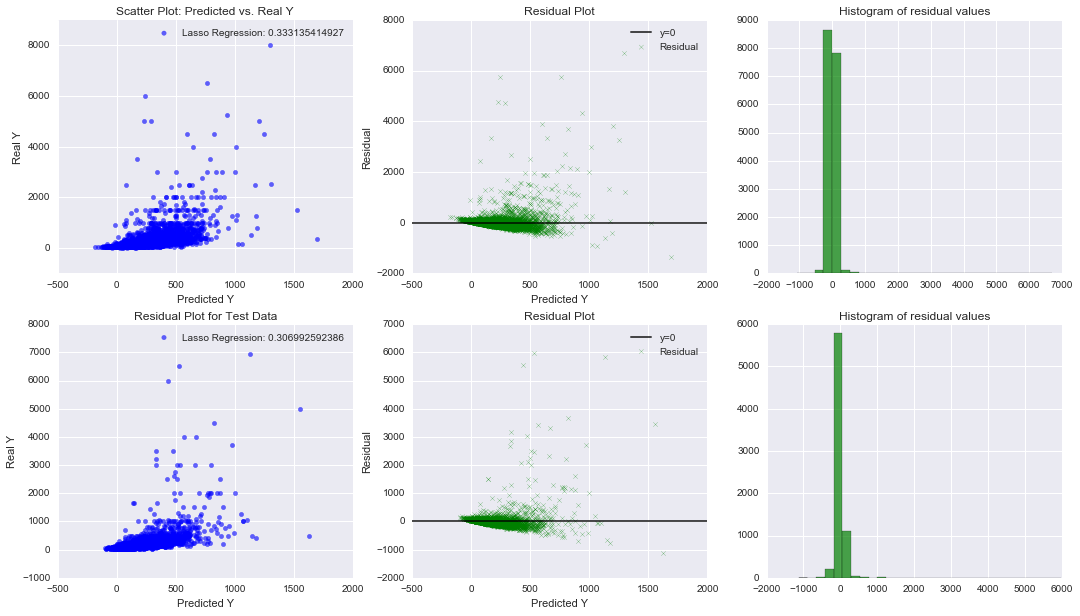

In [35]:
# plot the residuals for a lasso regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

lasso_data_vals = LassoCV_model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], lasso_data_vals[2]['y_pred'], lasso_data_vals[2]['y_real'], 'Lasso Regression: {}'.format(data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], lasso_data_vals[3]['y_pred_test'], lasso_data_vals[3]['y_real_test'], 'Lasso Regression: {}'.format(data_vals[1]), 'Residual Plot for Test Data')
plt.show()

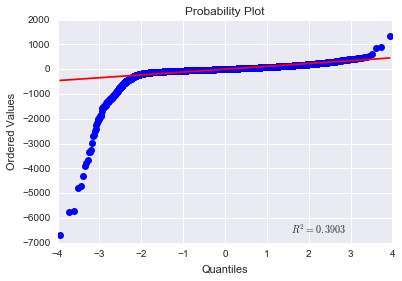

In [36]:
# qq plot for the train residuals
stats.probplot(lasso_data_vals[2]['y_pred'] - lasso_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Lasso Regression with Log-Transformed Response

In [37]:
reg_params = 10.**np.linspace(-10, 5, 10)
LassoCV_model = model_iterations(5, x, y_log, LassoCV(alphas=reg_params, fit_intercept=True, cv=5), True)

Mean Train Score: 0.362542038651
Mean Test Score: 0.340433970597


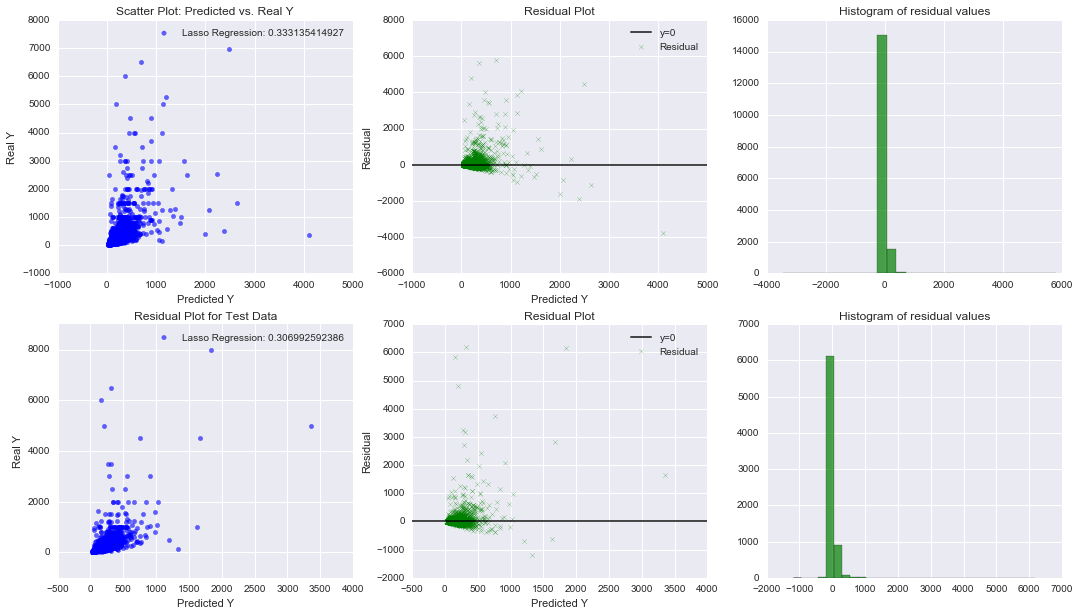

In [38]:
# plot the residuals of a lasso regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

lasso_data_vals = LassoCV_model.data_frame_convert_log()
plot_residual(axes[0][0], axes[0][1], axes[0][2], lasso_data_vals[2]['y_pred'], lasso_data_vals[2]['y_real'], 'Lasso Regression: {}'.format(data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], lasso_data_vals[3]['y_pred_test'], lasso_data_vals[3]['y_real_test'], 'Lasso Regression: {}'.format(data_vals[1]), 'Residual Plot for Test Data')
plt.show()

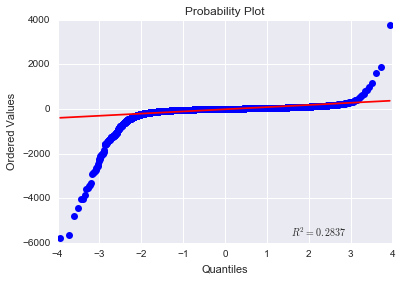

In [39]:
# qq plot for the train residuals
stats.probplot(lasso_data_vals[2]['y_pred'] - lasso_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

## Random Forest Regressor
<hr>

In [42]:
# random forest regressor
def random_forest_model(x_train, y_train, x_test, y_test):
    best_test_score = 0
    best_train_score = 0
    best_depth = 0
    # tune for tree depth from 1 to 20
    for j in range(1, 21):
        rf = RandomForestRegressor(n_estimators=50, max_depth=j, oob_score=True)
        rf.fit(x_train, y_train)
        score_train = rf.score(x_train, y_train)
        score = rf.score(x_test, y_test)
        if score > best_test_score:
            best_test_score = score
            best_train_score = score_train
            best_depth = j
    return best_train_score, best_test_score, best_depth

### Random Forest Regressor Non-Transformed Response

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
rf_values = random_forest_model(x_train, y_train, x_test, y_test)

In [44]:
print 'Train Score with Best Test:', rf_values[0]
print 'Best Test Score:', rf_values[1]
print 'Best Depth', rf_values[2]

Train Score with Best Test: 0.82042162985
Best Test Score: 0.396110401701
Best Depth 11


### Random Forest Regressor Log-Transformed Response

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y_log, test_size=0.35)
rf_values = random_forest_model(x_train, y_train, x_test, y_test)

In [46]:
print 'Train Score with Best Test:', rf_values[0]
print 'Best Test Score:', rf_values[1]
print 'Best Depth', rf_values[2]

Train Score with Best Test: 0.860332365292
Best Test Score: 0.699027621618
Best Depth 17


### Random Forest Regressor Analysis

We see that Random Forest Regressor yields a slightly higher train score as compared to Ridge and Lasso, which may be a result of overfitting. This overfitting is reflected on the test score, which is slightly lower than the test scores obtained by Ridge and Lasso roughly by 0.04.

## Median Absolute Error

We now use Median Absolute Error as our loss function to evaluate which of the models is doing better. Intuitively, Median Absolute Error is less sensitive to outliers than Mean Squared Error and translates nicely to a dollar amount relative to price.

In [25]:
def median_absolute_errors(x, y, log_bool=None):
    reg_params = 10.**np.linspace(-10, 5, 10)
    models = [ linear_model.Ridge(), RidgeCV(alphas=reg_params, cv=5), linear_model.Lasso(), LassoCV(alphas=reg_params, cv=5), linear_model.ElasticNet(), linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
    model_labels = np.array(['Ridge', 'RidgeCV', 'Lasso', 'LassoCV', 'ElasticNet', 'BayesRidge', 'OMP'])
    model_errors = np.array([])

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=15)

    for model in models:
        model.fit(X_train, y_train)
        if not log_bool:
            model_err = metrics.median_absolute_error((y_test), model.predict(X_test))
            model_errors = np.append(model_errors, model_err)
        else:
            model_err = metrics.median_absolute_error(np.exp(y_test), np.exp(model.predict(X_test)))
            model_errors = np.append(model_errors, model_err)
    
    model_position = np.arange(model_errors.shape[0])
    models_sorted = np.argsort(model_errors)
    for i, model in enumerate(model_labels):
        print 'Model {} Results: {}'.format(model_labels[i], model_errors[i])

    plt.figure(figsize=(10,8))
    plt.bar(model_position, model_errors[models_sorted], align='center')
    plt.xticks(model_position, model_labels[models_sorted])
    plt.xlabel('Estimator')
    plt.ylabel('Median Absolute Error')
    plt.show()

### Median Absolute Error Untransformed Response


/Users/AlexPeed/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


Model Ridge Results: 45.0733616865
Model RidgeCV Results: 44.041747509
Model Lasso Results: 41.1483774137
Model LassoCV Results: 41.1483774137
Model ElasticNet Results: 44.4211434345
Model BayesRidge Results: 44.8814025582
Model OMP Results: 44.1673181849


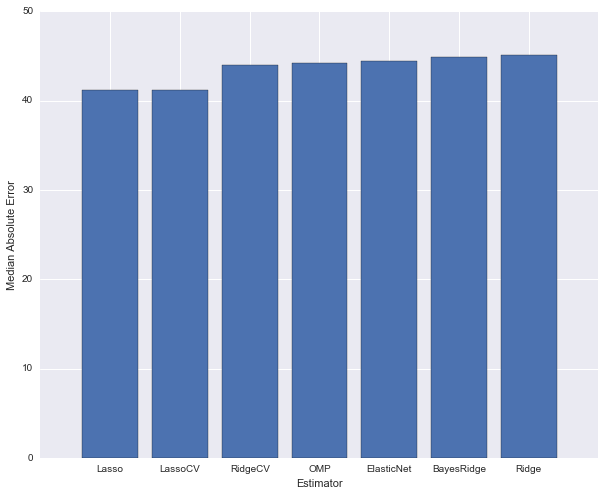

In [26]:
median_absolute_errors(x, y)

### Median Absolute Error Log-Transformed Response

Model Ridge Results: 25.3664157775
Model RidgeCV Results: 25.3664157775
Model Lasso Results: 53.9575620514
Model LassoCV Results: 25.3705859359
Model ElasticNet Results: 53.9575620514
Model BayesRidge Results: 25.3482809254
Model OMP Results: 27.7305304401


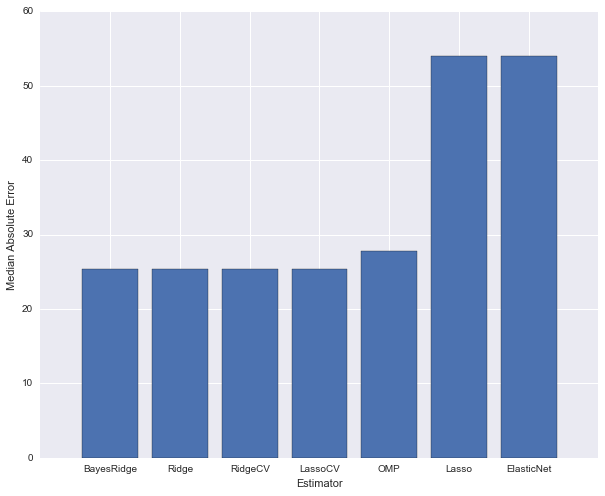

In [27]:
median_absolute_errors(x, y_log, True)